> Created on Sat Aug  1 22:20:30 2020 @author: Richie Bao-caDesign设计(cadesign.cn)__+updated on Tue Dec 28 13:06:18 2021 by Richie Bao 

## 2.2.1 编程线性代数

如果想对某一解决问题的方法有比较清晰的理解，数学知识则很难规避，线性代数则是其中之一。回归部分方程式的矩阵求解，以及特征向量与降维（例如主成成分分析PCA），空间变换等内容都需要基础的线性代数知识。因此以'漫画线性代数'结构为主要思路，结合'Gilbert Strang.Introduction to linear algbra'及相关参考文献，借助python编程语言，结合python图表打印可视化，将主要的知识点串联起来，作为用到线性代数知识解决相关问题的基础。主要使用的库为[SymPy(Matrices-linear algebra)](https://docs.sympy.org/latest/modules/matrices/matrices.html)。

线性代数（linear algebra）是关于向量空间和线性映射的一个数学分支，包括对线、面和子空间的研究，同时也涉及到所有的向量空间的一般性质。笼统的说，是使用向量和矩阵的数学空间表达方式，将$m$维空间（世界）与$n$维空间（世界）联系起来的数学分支。在规划设计学科，实际上我们所使用的rhinoceros（grasshopper）等三维软件平台对大量几何对象空间变换的操作就是对线性代数的应用。

> 该部分参考文献
> 1. [日]高桥 信著作,Inoue Iroha,株式会社 TREND-PRO漫画制作,腾永红译.漫画线性代数[M].科学出版社.北京.2009.08；
> 2. Gilbert Strang.Introduction to linear algbra[M].Wellesley-Cambridge Press; Fifth Edition edition (June 10, 2016)
> 3. Wikipedia

### 2.2.1.1 矩阵

形如$\begin{bmatrix} a_{11}  & a_{12} &\ldots&a_{1n}  \\ a_{21}  & a_{22} &\ldots&a_{2n}\\ \vdots & \vdots & \ddots & \vdots \\ a_{m1}  & a_{m2} &\ldots&a_{mn}  \end{bmatrix} $的数据集合即为$m$行$n$列，$m \times n$矩阵，这同于numpy的数组形式，也可以用pandas的DataFrame格式表达。在统计学上就可以通过矩阵方式对样本特征表述，尤其具有多个特征的样本。而$m$可以称为行标，而$n$则称为列标，组合起来就代表了矩阵中的每个元素。对于形如$\begin{bmatrix} a_{11}  & a_{12} &\ldots&a_{1n}  \\ a_{21}  & a_{22} &\ldots&a_{2n}\\ \vdots & \vdots & \ddots & \vdots \\ a_{n1}  & a_{n2} &\ldots&a_{nn}  \end{bmatrix} $，即$m=n$的矩阵为$n$阶方阵，对角线上的元素称为对角元素。在相关性分析中，所计算两两相关性的数组结果，就是方阵。其对角元素皆为1，为自身相关性计算结果。

#### 1）矩阵的运算

1. 加（减）法（addition,subtraction ）

$m \times  n$矩阵$A$和$B$的和（差）：$A \pm B$为一个$m \times n$矩阵，其中每个元素是$A$和$B$相应元素的和（差），$(A \pm B)_{i,j} = A_{i,j} \pm  B_{i,j} $，例如$\begin{bmatrix}1 & 3&1 \\1 & 0&0 \end{bmatrix} + \begin{bmatrix}0 & 0&5 \\7 & 5&0 \end{bmatrix} = \begin{bmatrix}1+0& 3+0&1+5 \\1+7 & 0+5&0+0 \end{bmatrix} = \begin{bmatrix}1 & 3 &6\\8 & 5&0 \end{bmatrix}  $

2. 数乘（倍数,multiple）

标量$c$与与矩阵$A$的数乘，cA的每个元素是$A$的相应元素与$c$的乘积，$(cA)_{i,j} =c  \cdot A_{i,j}  $，例如$2 \cdot \begin{bmatrix}1 & 3&1 \\1 & 0&0 \end{bmatrix}=\begin{bmatrix}2 \cdot1 & 2 \cdot3&2 \cdot1 \\2 \cdot1 & 2 \cdot0&2 \cdot0 \end{bmatrix}=\begin{bmatrix}2 & 6&2 \\2 & 0&0 \end{bmatrix}$

3. 乘法（Multiplication）

两个矩阵的乘法仅当第1个矩阵$A$的列数（column）和另一个矩阵$B$的行数（row）相等时才能定义。如果$A$是$m \times n$矩阵，$B$是$n \times p$，它们的乘积$AB$，是一个$m \times p$矩阵，$[AB]_{i,j}= A_{i,1} B_{1,j}+   A_{i,2} B_{2,j}+ \ldots + A_{i,n} B_{n,j}= \sum_{r=1}^n  A_{i,r}  B_{r,j}  $，例如$\begin{bmatrix}1 & 0&2 \\-1 & 3&1 \end{bmatrix} \times  \begin{bmatrix}3 & 1 \\2 & 1 \\1&0\end{bmatrix}= \begin{bmatrix}(1 \times 3 & 0 \times 2&2  \times 1)&(1 \times 1 & 0 \times 1&2  \times 0)\\(-1 \times 3 & 3 \times 2&1  \times 1)&(-1 \times 1 & 3 \times 1&1 \times 0) \end{bmatrix}= \begin{bmatrix}5 & 1 \\4 & 2 \end{bmatrix} $

4. 幂（exponentiation）

相等于矩阵乘法，例如$  \begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix} ^{3} = \begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix} \begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix} \begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix}= \begin{bmatrix}1 \times 1+2 \times 3\ & 1 \times 2+2 \times 4 \\3 \times 1+4 \times 2 & 3  \times 2+4 \times 4\end{bmatrix} \begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix}  = \begin{bmatrix}7& 10\\15& 22 \end{bmatrix} \begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix}  = \begin{bmatrix}7 \times 1+10 \times 3 & 7 \times 2+10 \times 4 \\15 \times 1+22 \times 3 & 15 \times 2+22 \times 4 \end{bmatrix} = \begin{bmatrix}37 & 54\\81 & 118 \end{bmatrix}  $

* 线性方程组

矩阵乘法的一个基本应用是在线性方程组上，线性方程组是数学方程组的一种，它符合以下的形式：$\begin{cases} a_{1,1} x_{1}+a_{1,2} x_{2}+ \ldots +a_{1,n} x_{n}= b_{1} \\ a_{2,1} x_{1}+a_{2,2} x_{2}+ \ldots +a_{2,n} x_{n}= b_{2} \\ \vdots  \\ a_{m,1} x_{1}+a_{m,2} x_{2}+ \ldots +a_{m,n} x_{n}= b_{m}  \end{cases} $其中$a_{1,1},a_{1,2}$以及$b_{1},b_{2}$等等是已知的常数，而$ x_{1},x_{2}$等等则是要求的未知数。如果用线性代数中的概念来表达，则线性方程组可写为：$Ax=b$，其中$A$是$m \times n$矩阵，$x$是含有$n$个元素列向量，$b$是含有$m$个元素列向量。

$A= \begin{bmatrix} a_{1,1}  & a_{1,2}& \ldots & a_{1,n}\\a_{2,1}  & a_{2,2}& \ldots & a_{2,n} \\ \vdots & \vdots & \ddots & \vdots \\a_{m,1}  & a_{m,2}& \ldots & a_{m,n}\end{bmatrix} $，$x= \begin{bmatrix} x_{1} \\x_{2}\\ \vdots \\x_{n}\end{bmatrix} $，$b= \begin{bmatrix} b_{1}   \\b_{2} \\ \vdots\\ b_{m}  \end{bmatrix} $

这是线性方程组的另一种记录方法，已知矩阵$A$和向量$b$的情况下求得未知向量$x$是线性代数的基本问题。


在多元回归部分，阐述过使用矩阵的方式求解回归模型，对于样本包含多个特征（解释变量）即$n$列，多个样本（样本容量）即$m$行，常规表达为$y=  \alpha  + \beta _{1} x_{1} + \beta _{2} x_{2}+  \ldots + \beta _{n} x_{n} $，其中$x_{1} ,x_{2}, \ldots ,x_{n}$为$n$个特征，每个特征下实际上包含有多个样本实例（$m$行），即$\begin{cases}  Y_{1}= \alpha  + \beta _{1} x_{11} + \beta _{2} x_{12}+  \ldots + \beta _{n} x_{1n} \\Y_{2}=\alpha  + \beta _{1} x_{21} + \beta _{2} x_{22}+  \ldots + \beta _{n} x_{2n}\\ \vdots \\Y_{n}=\alpha  + \beta _{1} x_{m1} + \beta _{2} x_{m2}+  \ldots + \beta _{n} x_{mn} \end{cases} $，表达为矩阵形式为$\begin{bmatrix} Y_{1}   \\Y_{2}\\ \vdots\\Y_{n}  \end{bmatrix} = \begin{bmatrix} \alpha  + \beta _{1} x_{11} + \beta _{2} x_{12}+  \ldots + \beta _{n} x_{1n} \\\alpha  + \beta _{1} x_{21} + \beta _{2} x_{22}+  \ldots + \beta _{n} x_{2n}\\ \vdots \\\alpha  + \beta _{1} x_{m1} + \beta _{2} x_{m2}+  \ldots + \beta _{n} x_{mn}\end{bmatrix} $，可以进一步简化为，$\begin{bmatrix} Y_{1}   \\Y_{2}\\ \vdots\\Y_{n}  \end{bmatrix} =\begin{bmatrix} 1  + x_{11} +x_{12}+  \ldots + x_{1n} \\1  + x_{21} + x_{22}+  \ldots +  x_{2n}\\ \vdots \\1  +  x_{m1} + x_{m2}+  \ldots + x_{mn}\end{bmatrix}  \times  \begin{bmatrix} \alpha  \\  \beta_{1} \\\beta_{2}\\ \vdots \\\beta_{n}  \end{bmatrix} $，实际上就是应用矩阵的乘法。

In [2]:
import sympy
from sympy import Matrix,pprint

A=Matrix([[1,3,1],[1,0,0]])
B=Matrix([[0,0,5],[7,5,0]])
print("矩阵加法：")
pprint(A+B)
print("_"*50)

print("数乘：")
pprint(2*A)
print("_"*50)

C=Matrix([[1,0,2],[-1,3,1]])
D=Matrix([[3,1],[2,1],[1,0]])
print("乘法：")
pprint(C*D)
print("_"*50)

E=Matrix([[1,2],[3,4]])
print("幂：")
pprint(E**3)
print("_"*50)  

矩阵加法：
⎡1  3  6⎤
⎢       ⎥
⎣8  5  0⎦
__________________________________________________
数乘：
⎡2  6  2⎤
⎢       ⎥
⎣2  0  0⎦
__________________________________________________
乘法：
⎡5  1⎤
⎢    ⎥
⎣4  2⎦
__________________________________________________
幂：
⎡37  54 ⎤
⎢       ⎥
⎣81  118⎦
__________________________________________________


#### 2）特殊矩阵

1. 零矩阵

所有元素均为0的矩阵，例如，$ \begin{bmatrix}0 & 0 \\0 & 0 \end{bmatrix} $

2. 转置矩阵（transpose）

是指将$m \times n$矩阵$A= \begin{bmatrix} a_{1,1}  & a_{1,2}& \ldots & a_{1,n}\\a_{2,1}  & a_{2,2}& \ldots & a_{2,n} \\ \vdots & \vdots & \ddots & \vdots \\a_{m,1}  & a_{m,2}& \ldots & a_{m,n}\end{bmatrix} $，交换行列后得到的$n \times m$，$\begin{bmatrix} a_{1,1}  & a_{2,1}& \ldots &a_{m,1} \\ a_{1,2}  & a_{2,2}& \ldots &a_{m,2} \\ \vdots & \vdots & \ddots & \vdots \\ a_{1,n}  & a_{2,n}& \ldots &a_{m,n}\end{bmatrix} $，可以用$A^{T} $表示，例如$3 \times 2$的矩阵$\begin{bmatrix}1 & 2 \\3 & 4\\5&6 \end{bmatrix} $的转置矩阵为$2 \times 3$矩阵$\begin{bmatrix}1& 3&5 \\2 & 4&6 \end{bmatrix} $。

3. 对称矩阵（symmetric matrix）

以对角元素为中心线对称的$n$阶方阵，例如$\begin{bmatrix}1 & 5&6&7 \\5 & 2&8&9\\6&8&3&10\\7&9&10&4 \end{bmatrix} $，对称矩阵与其转置矩阵完全相同。

4. (5.)，上三角矩阵和下三角矩阵（triangular matrix）

如$\begin{bmatrix}1 & 5&6&7 \\0 & 2&8&9\\0&0&3&10\\0&0&0&4 \end{bmatrix} $，对角元素左下角的所有元素均为0的$n$阶矩阵。

如$\begin{bmatrix}1 & 0&0&0 \\5 & 2&0&0\\6&8&3&0\\7&9&10&4 \end{bmatrix}$,对角元素右上角的所有元素均为0的$n$阶矩阵。

6. 对角矩阵 (diagonal matrix)

如$\begin{bmatrix}1 & 0&0&0 \\0& 2&0&0\\0&0&3&0\\0&0&0&4 \end{bmatrix}$，对角元素以外的元素均为0的$n$阶矩阵，可表示为$diag(1,2,3,4)$，对角矩阵的$p$次幂，等于对角元素的$p$次幂，公式为：$\begin{bmatrix} a_{1,1}  & 0&0&0 \\0& a_{2,2}&0&0\\0&0&a_{3,3}&0\\0&0&0&a_{n,n} \end{bmatrix}^{p} =\begin{bmatrix} a_{1,1}^p  & 0&0&0 \\0& a_{2,2}^p&0&0\\0&0&a_{3,3}^p&0\\0&0&0&a_{n,n}^p \end{bmatrix}$，例如$\begin{bmatrix}2 & 0 \\0 & 3 \end{bmatrix} ^{2} = \begin{bmatrix}2^{2}  &  0  \\0&  3^{2}  \end{bmatrix} = \begin{bmatrix}4 & 0 \\0& 9 \end{bmatrix} $

7. 单位矩阵（identity matrix）

如$\begin{bmatrix}1 & 0&0&0 \\0 & 1&0&0 \\ 0&0&1&0\\0&0&0&1   \end{bmatrix} $，对角元素均为1，对角元素以外的其它元素全部为0的$n$阶方阵，即$diag(1,1 ,\ldots ,1)$。单位矩阵与任何矩阵相乘，都对这个矩阵没有任何影响。

8. 逆矩阵 （inverse matrix）

又称反矩阵，在线性代数中，给定一个$n$阶方阵$A$，若存在$n$阶方阵B，使得$AB=BA=I_n$，其中$I_n$为$n$阶单位矩阵，则称$A$是可逆的，且$B$是A的逆矩阵，记作$A^{-1}$。只有方阵$n \times n $才可能有逆矩阵。若方阵$A$的逆矩阵存在，则称$A$为非奇异方阵或可逆矩阵。逆矩阵的求法有代数余子式法（不实用），消元法等，对解法感兴趣的可以参看'漫画线性代数'。在代码的世界里，直接使用sympy库提供的方法。

并不是所有的方阵都有逆矩阵，可以使用行列式指标determinant(det)，用sympy库的det()方法计算判断。如果$det(A)  \neq  0$，则矩阵$A$可逆。

In [3]:
print("零矩阵：")
pprint(sympy.zeros(2))

print("转置矩阵：")
F=Matrix([[1,2],[3,4],[5,6]])
pprint(F.T)

print("对称矩阵的转置矩阵：")
G=Matrix([[1,5,6,7],[5,2,8,9],[6,8,3,10],[7,9,10,4]])
pprint(G.T)

print("对角矩阵的2次幂：")
H=Matrix([[2,0],[0,3]])
pprint(H**2)

print("单位矩阵：")
pprint(sympy.eye(4))

print("单位矩阵与任何矩阵相乘，都对这个矩阵没有任何影响:")
pprint(sympy.eye(4)*G)

print("求解逆矩阵，并乘以自身：")
print("使用-1次方计算逆矩阵:")
G_inverse=G**-1
pprint(G*G_inverse)
print("使用.inv()计算逆矩阵:")
G_inverse_=G.inv()
pprint(G*G_inverse_)

print("判断方阵是否有逆矩阵：")
print(G.det())
print(G_inverse.det())

零矩阵：
⎡0  0⎤
⎢    ⎥
⎣0  0⎦
转置矩阵：
⎡1  3  5⎤
⎢       ⎥
⎣2  4  6⎦
对称矩阵的转置矩阵：
⎡1  5  6   7 ⎤
⎢            ⎥
⎢5  2  8   9 ⎥
⎢            ⎥
⎢6  8  3   10⎥
⎢            ⎥
⎣7  9  10  4 ⎦
对角矩阵的2次幂：
⎡4  0⎤
⎢    ⎥
⎣0  9⎦
单位矩阵：
⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦
单位矩阵与任何矩阵相乘，都对这个矩阵没有任何影响:
⎡1  5  6   7 ⎤
⎢            ⎥
⎢5  2  8   9 ⎥
⎢            ⎥
⎢6  8  3   10⎥
⎢            ⎥
⎣7  9  10  4 ⎦
求解逆矩阵，并乘以自身：
使用-1次方计算逆矩阵:
⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦
使用.inv()计算逆矩阵:
⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦
判断方阵是否有逆矩阵：
-3123
-1/3123


### 2.2.1.2  向量 （euclidean vector）

#### 1）向量概念，表达及运算

一般同时满足具有大小和方向两个性质的几何对象即可认为是向量，其代数表示指在指定了一个坐标系之后，用一个向量在该坐标系下的坐标来表示该向量，兼具符号的抽象性和几何形象性，具有最高的实用性，广泛应用于定量分析的情景。对于自由向量，将向量的起点平移到坐标原点后，向量就可以用一个坐标系下的一个点来表示，该点的坐标值即向量的终点坐标

设一个向量$\vec{a}$，有坐标系$S$。在$S$中定义好若干个特殊的基本向量（称为基向量Base Vector，各个基向量共同组成该坐标系下的基底）$\vec{ e_{1} },\vec{ e_{2} }, \ldots ,\vec{ e_{n} }$之后，则向量在各个基向量下的投影即为对应的坐标系，各个投影值组成了该向量在该坐标系$S$下可唯一表示的有序数组（即坐标），且与向量的终点一一对应。换言之，其它的向量只需通过将这些基本向量拉伸后再按照平行四边形法则进行向量加法即可表示（通常被称为“用基底线性表出一个向量”，即该向量是基向量的某种线性组合），即：$\vec{ a}=a_{1} \vec{ e_{1} },a_{2} \vec{ e_{2} }, \ldots ,a_{n} \vec{ e_{n} }$，其中$\vec{ a_{1} },\vec{ a_{2} }, \ldots ,\vec{ a_{n} }$是$\vec{ a}$分别在$\vec{ e_{1} },\vec{ e_{2} } \ldots ,\vec{ e_{n} }$下对应的投影。当基底已知，可直接省略各基向量的符号，类似于坐标系上的点， 直接用坐标表示为$\vec{a}=( a_{1}, a_{2}, \ldots , a_{n} )$。在矩阵运算中，向量更多的被写成类似于矩阵的列向量或行向量。在线性代数中所指的向量，通常默认为列向量。如一个向量$\vec{a}=(a,b,c)$可以写成：$\vec{a}= \begin{bmatrix}a \\b\\c \end{bmatrix} $，$\vec{a}= \begin{bmatrix}a &b&c \end{bmatrix} $，其中第一个为列向量写法，第二个为行向量写法。$n$维列向量可视为$n \times 1$矩阵，$n$维行向量可视为$1\times n$矩阵。

在常见的三维空间直角坐标系$\bigcirc xyz$（三维笛卡尔坐标系）里，基本向量就是行轴（$\bigcirc x$）、竖轴（$\bigcirc y$）、以及纵轴（$\bigcirc z$）为方向的三个长度为1的单位向量$\vec{i},\vec{j},\vec{k}$，即基向量。这三个向量取好之后，其它的向量就可以透过三元数组来表示，因为它们可以表示成一定倍数的三个基本向量的总和。比如说一个标示为（2,1,3）的向量就是2个向量$\vec{i}$加上1个向量$\vec{j}$加上3个向量$\vec{k}$得到的向量，即：$(a,b,c)=a\vec{i}+b\vec{j}+c\vec{k}$。因此向量本质上讲即为矩阵，向量的计算同于矩阵的计算。

SymPy库对向量计算有两种方式，一种是完全使用矩阵，因为二者计算相同，例如和、差、倍数和积；另一种是该库提供了专门针对向量的类'Vector'，通过Vector所提供的方法可以实现向量的表达及向量的基本运算。向量的主要目的是要解决空间几何问题，因此对于向量的理解要将空间几何图形与表达式结合起来，才能够有效的理解前因后果。在了解基本的向量概念、坐标空间、运算之后，如果要用代码来表达和计算向量，有必要阅读SymPy对应的[Vector](https://docs.sympy.org/dev/modules/vector/index.html)以及[Matrices(linear algebra)](https://docs.sympy.org/latest/modules/matrices/matrices.html)两个部分，那么再阅读下述代码将会相对轻松。

为了方便使用matplotlib打印三维空间下向量，定义了`vector_plot_3d`函数。首先定义了名称为'C'的三维坐标系统，获取其基向量'i,j,k'，用基向量构建向量'v1'，同时通过提取该向量在三个轴向上的系数建立v1向量在各轴上的分量（投影向量），各轴的投影向量之和即为v1向量，打印三维空间上的向量图形，观察向量间的关系。注意，向量空间起始位置的确定，vector_k的起始点，以vector_i和vector_j之和的向量作为起点，而vector_j以vector_i作为起点。

* 把$n \times 1$向量$\begin{bmatrix} a_{1}  \\ a_{2} \\ \vdots \\ a_{n}  \end{bmatrix} $，所有分量构成的集合表示为$ \\R^{n} $。

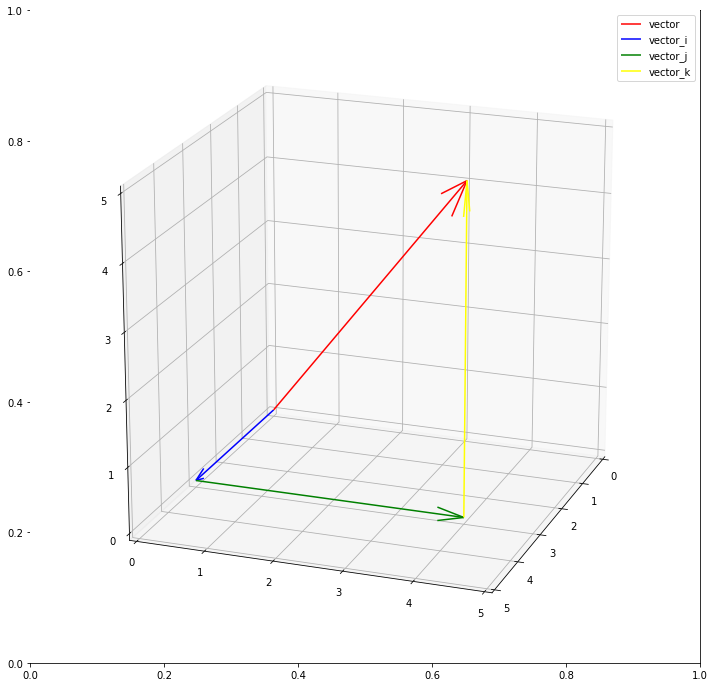

In [4]:
import matplotlib.pyplot as plt
from sympy.vector.coordsysrect import CoordSys3D
from sympy.vector.vector import Vector, BaseVector
from sympy.vector import Vector

fig, ax=plt.subplots(figsize=(12,12))
ax=fig.add_subplot( projection='3d')

def vector_plot_3d(ax_3d,C,origin_vector,vector,color='r',label='vector',arrow_length_ratio=0.1):
    '''
    funciton - 转换SymPy的vector及Matrix数据格式为matplotlib可以打印的数据格式
    
    Paras:
        ax_3d - matplotlib的3d格式子图
        C - /coordinate_system - SymPy下定义的坐标系
        origin_vector - 如果是固定向量，给定向量的起点（使用向量，即表示从坐标原点所指向的位置），如果是自由向量，起点设置为坐标原点
        vector - 所要打印的向量
        color - 向量色彩
        label - 向量标签
        arrow_length_ratio - 向量箭头大小     
    '''
    origin_vector_matrix=origin_vector.to_matrix(C)
    x=origin_vector_matrix.row(0)[0]
    y=origin_vector_matrix.row(1)[0]
    z=origin_vector_matrix.row(2)[0]
    
    vector_matrix=vector.to_matrix(C)
    u=vector_matrix.row(0)[0]
    v=vector_matrix.row(1)[0]
    w=vector_matrix.row(2)[0]
    ax_3d.quiver(x,y,z,u,v,w,color=color,label=label,arrow_length_ratio=arrow_length_ratio)


#定义坐标系统，以及打印向量v1=3*i+4*j+5*k
C=CoordSys3D('C')
i, j, k = C.base_vectors()
v1=3*i+4*j+5*k
v1_origin=Vector.zero
vector_plot_3d(ax,C,v1_origin,v1,color='r',label='vector',arrow_length_ratio=0.1)

#打印向量v1=3*i+4*j+5*k在轴上的投影
v1_i=v1.coeff(i)*i
vector_plot_3d(ax,C,v1_origin,v1_i,color='b',label='vector_i',arrow_length_ratio=0.1)

v1_j=v1.coeff(j)*j
vector_plot_3d(ax,C,v1_i,v1_j,color='g',label='vector_j',arrow_length_ratio=0.1)

v1_k=v1.coeff(k)*k
vector_plot_3d(ax,C,v1_i+v1_j,v1_k,color='yellow',label='vector_k',arrow_length_ratio=0.1)

ax.set_xlim3d(0,5)
ax.set_ylim3d(0,5)
ax.set_zlim3d(0,5)

ax.legend()
ax.view_init(20,20) #可以旋转图形的角度，方便观察
plt.show()

#### 2）线性无关

在线性代数里，向量空间的一组元素中，若没有向量可用有限个其它向量的线性组合所表示，则称为线性无关（linearly independent）或线性独立（例如，(1, 0, 0)，(0, 1, 0)和(0, 0, 1)），反之称为线性相关（linearly dependnet）（例如(2, −1, 1)，(1, 0, 1)和(3, −1, 2)，因为第3个是前两个的和）。即假设$V$在域$K$上的向量空间，如果从域$K$中有非全零的元素$a_{1} ,a_{2} , \ldots ,a_{n} $，使得$a_{1}v_{1}+a_{2} v_{2}+ \ldots +a_{n}v_{n}=0 $，或建立的表示为，$\sum_{i=1}^n  a_{i}   v_{i} =0$，其中$v_{1} ,v_{2} , \ldots ,v_{n} $是$V$的向量，称它们为线性相关，其中右边的0，为$\vec 0$即0向量（vector），而不是0标量（scalar）；如果$K$中不存在这样的元素，那么$v_{1} ,v_{2} , \ldots ,v_{n} $线性无关。对线性无关可以给出更直接的定义，向量$v_{1} ,v_{2} , \ldots ,v_{n} $线性无关，若且唯若它们满足以下条件：如果$a_{1} ,a_{2} , \ldots ,a_{n} $是$K$的元素，适合：$a_{1}v_{1}+a_{2} v_{2}+ \ldots +a_{n}v_{n}=0 $，那么对所有$i=1,2, \ldots ,n$都有$a_{i} =0$。

在$V$中的一个无限集，如果它任何一个有限子集都是线性无关，那么原来的无限集也是线性无关。线性相关性是线性代数的重要概念，因为线性无关的一组向量可以生成一个向量空间，而这组向量则是这个向量空间的基。

首先通过sympy.vector的CoordSys3D方法建立三维坐标系（可以直接提取单位向量$\vec{i},\vec{j},\vec{k}$），依托该坐标系建立（$V$）向量集合，包括v2,v3,v4,v5，均由单位向量的倍数建立，如果倍数等于0，例如`v2=a*1*N.i+a*0*N.j`，也保持了0的存在，以保持各个方向上的一致性，便于观察。可以通过打印各个单独向量，查看变量在sympy中的表现形式。该向量集合是线性相关，可以给出除了$a=b=c=d=0$外，其它a,b,c,d的值，即有非全零的元素，例如a_,b_,c_,d_=1,2,0,-1  ，或者a_,b_,c_,d_=1,-3,-1,2  ，均也满足$a_{1}v_{1}+a_{2} v_{2}+ \ldots +a_{n}v_{n}=0 $，上述的a,b,c,d即为$a_{1} ,a_{2} , \ldots ,a_{n} $。因此可以打印图形，通过定义`move_alongVectors`函数实现，可以看到第1，2个图形，形成闭合平面二维图形（回到起点）。同样在三维空间中，定义了向量集合v6,v7,v8,v9，因为线性相关，如第3个图形，形成空间闭合的折线（回到起点）。

判断一个向量集合$V$，是否线性无关，可以使用`matrix.rref()`将表示向量的矩阵转换为行阶梯形矩阵（Row Echelon Form），如果返回的简化行阶梯形矩阵末尾行存在全零值，则表明该向量数据集为线性相关。例如，使用`matrix.to_matrix(C)`方法将v2,v3,v4,v5等向量转换为矩阵表达形式，并通过`matrix.col_insert()`方法合并为矩阵，使用`matrix.rref()`计算，对于数据集v2,v3,v4,v5，其简化行阶梯形矩阵计算结果为$\begin{bmatrix}1 & 0&0 \\0 & 1&0\\0&0&1\\0&0&0 \end{bmatrix} $，末尾包括全零行，因此为线性相关。同时返回了主元位置的列表为（0，1，2）。而v10,v11组成的向量集合则末尾不含全零行，因此为线性无关，无法通过各个向量构建闭合的空间折线，则可以生成向量空间，这组向量就是这个向量空间的基。对于$\\R_{m} $的任意元素向量$\begin{bmatrix} y_{1} \\ y_{2}\\ \vdots \\ y_{m}   \end{bmatrix}$，当$\begin{bmatrix} y_{1} \\ y_{2}\\ \vdots \\ y_{m}   \end{bmatrix} = c_{1} \begin{bmatrix} a_{11} \\ a_{21}\\ \vdots \\ a_{m1}   \end{bmatrix} + c_{2} \begin{bmatrix} a_{12} \\ a_{22}\\ \vdots \\ a_{m2}   \end{bmatrix} + \ldots + c_{n} \begin{bmatrix} a_{1n} \\ a_{2n}\\ \vdots \\ a_{mn}   \end{bmatrix} $的解$c_{1} ,c_{2}, \ldots ,c_{n}  $均为零时，则把集合$\Bigg\{ \begin{bmatrix} a_{11} \\ a_{21}\\ \vdots \\ a_{m1}   \end{bmatrix},\begin{bmatrix} a_{12} \\ a_{22}\\ \vdots \\ a_{m2}   \end{bmatrix} , \ldots , \begin{bmatrix} a_{1n} \\ a_{2n}\\ \vdots \\ a_{mn}   \end{bmatrix} \Bigg\}$叫做基，即为了表示$\\R_{m} $任意元素所必需的最少向量构成的集合。

* 阶梯型矩阵

线性代数中，一个矩阵如果符合下列条件的话，则称之为行阶梯型矩阵（Row Echelon Form）：

1. 所有非零行（矩阵的行至少有一个非零元素）在所有全零行的上面。即全零行都在矩阵的底部。
2. 非零行的首项系数（leading coefficient），也称主元，即最左边的首个非零元素，严格的比上面行的首项系数更靠右（有些版本会要求非零行的首项系数必须是1）。
3. 首项系数所在列，在该首项系数下面的元素都是零（前两条的推论）。

例如：$\begin{bmatrix}1 &  a_{1} &a_{2} | & b_{1}   \\0 &  2 &a_{3} | & b_{2} \\0 &  0 &1| & b_{3}  \end{bmatrix} $。

> 增广矩阵，又称广置矩阵，是在线性代数中系数矩阵的右边填上线性方程组等号右边的常数列得到的矩阵。例如，方程$AX=B$的系数矩阵为$A$，它的增广矩阵为$A | B$。方程组唯一确定增广矩阵，通过增广矩阵的初等行变换可用于判断对应线性方程组是否有解，以及化简原方程组的解。其竖线可以省略。

化简后的行阶梯型矩阵（reduced row echelon form，或译为简约行梯形式），也称作行规范形矩阵（row canonical form），如果满足额外的条件：每个首相系数是1，且是其所在列的唯一的非零元素，例如，$\begin{bmatrix}1& 0& a_{1}  &0& | & b_{1} \\0& 1&0&0& | &b_{2}  \\0&0&0&1& | & b_{3} \end{bmatrix} $，注意化简后的行阶梯型矩阵的左部分（系数部分）不意味着总是单位阵。

通过有限步的行初等变换，任何矩阵可以变换到行阶梯形。由于行初等变换保持了矩阵的行空间，因此行阶梯型矩阵的行空间与变换前的原矩阵的行空间相同（这也是在使用sympy.rref()计算化简后的行阶梯型矩阵（reduced row echelon form），需要将形状为$\begin{bmatrix} a_{1}i  &  a_{2}i & a_{3}i  \\ a_{1}j &  a_{2}j & a_{3}j\\ \vdots & \vdots & \vdots \\ a_{1}k &  a_{2}k& a_{3}k   \end{bmatrix} $的向量集合，转置矩阵变换为$\begin{bmatrix} a_{1}i  &  a_{1}j & a_{1}k  \\ a_{2}i &  a_{2}j & a_{2}k\\ \vdots & \vdots & \vdots \\ a_{3}i &  a_{3}j& a_{3}k   \end{bmatrix} $，保持矩阵行为$ a_{n} \vec{i}, a_{n}\vec{j}, a_{n}\vec{k}$）。行阶梯形的结果并不是唯一的。例如，行阶梯型乘以一个标量系数仍然是行阶梯形。但是，可以证明一个矩阵的化简后的行阶梯形是唯一的。

v_2345_matrix:
⎡0  3⋅c   d   a⎤
⎢              ⎥
⎢b   c   2⋅d  0⎥
⎢              ⎥
⎣0   0    0   0⎦
v_2345_matrix.T rref:
⎛⎡1  0  0⎤        ⎞
⎜⎢       ⎥        ⎟
⎜⎢0  1  0⎥        ⎟
⎜⎢       ⎥, (0, 1)⎟
⎜⎢0  0  0⎥        ⎟
⎜⎢       ⎥        ⎟
⎝⎣0  0  0⎦        ⎠
__________________________________________________
v_6789_matrix:
⎡0  3⋅g    0   e⎤
⎢               ⎥
⎢f   g     0   0⎥
⎢               ⎥
⎣0  -3⋅g  3⋅h  0⎦
v_6789_matrix.T rref:
⎛⎡1  0  0⎤           ⎞
⎜⎢       ⎥           ⎟
⎜⎢0  1  0⎥           ⎟
⎜⎢       ⎥, (0, 1, 2)⎟
⎜⎢0  0  1⎥           ⎟
⎜⎢       ⎥           ⎟
⎝⎣0  0  0⎦           ⎠
__________________________________________________
v_10_11_matrix:
⎡0  o⎤
⎢    ⎥
⎢p  0⎥
⎢    ⎥
⎣0  0⎦
v_10_11_matrix.T rref:
⎛⎡1  0  0⎤        ⎞
⎜⎢       ⎥, (0, 1)⎟
⎝⎣0  1  0⎦        ⎠


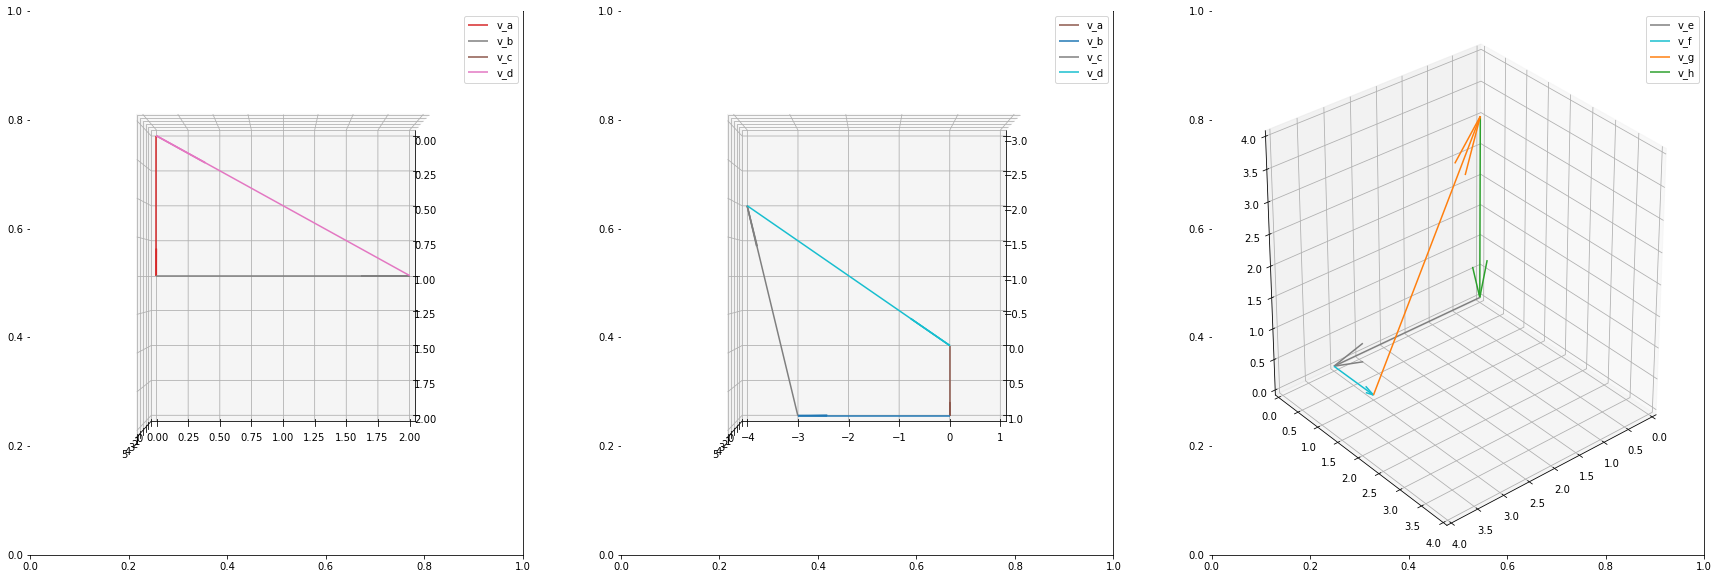

In [5]:
from sympy.vector import CoordSys3D
from sympy.abc import a, b, c,d,e,f,g,h,o,p #相当于a,b=sympy.symbols(["a","b"])
from sympy.vector import Vector
from sympy import pprint,Eq,solve
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, axs=plt.subplots(1,3,figsize=(30,10))
axs[0]=fig.add_subplot(1,3,1, projection='3d')
axs[1]=fig.add_subplot(1,3,2, projection='3d')
axs[2]=fig.add_subplot(1,3,3, projection='3d')

#A - 2维度，绘制v2+v3+v4+v5=0的解，线性相关，有多个解
N=CoordSys3D('N')
v2=a*1*N.i+a*0*N.j
v3=b*0*N.i+b*1*N.j
v4=c*3*N.i+c*1*N.j
v5=d*1*N.i+d*2*N.j
v0=Vector.zero

def move_alongVectors(vector_list,coeffi_list,C,ax,):
    import random
    import sympy
    '''
    function - 给定向量，及对应系数，延向量绘制
    
    Paras:
        vector_list - 向量列表，按移动顺序
        coeffi_list - 向量的系数    
        C - SymPy下定义的坐标系
        ax - 子图
    '''
    colors=[color[0] for color in mcolors.TABLEAU_COLORS.items()]  #mcolors.BASE_COLORS, mcolors.TABLEAU_COLORS,mcolors.CSS4_COLORS
    colors__random_selection=random.sample(colors,len(vector_list)-1)
    v_accumulation=[]
    v_accumulation.append(vector_list[0])
    #每个向量绘制以之前所有向量之和为起点
    for expr in vector_list[1:]:
        v_accumulation.append(expr+v_accumulation[-1])
    
    v_accumulation=v_accumulation[:-1]   
    for i in range(1,len(vector_list)):
        vector_plot_3d(ax,C,v_accumulation[i-1].subs(coeffi_list),vector_list[i].subs(coeffi_list),color=colors__random_selection[i-1],label='v_%s'%coeffi_list[i-1][0],arrow_length_ratio=0.2)
        
#v2+v3+v4+v5=0，向量之和为0的解,解-1
vector_list=[v0,v2,v3,v4,v5]
a_,b_,c_,d_=1,2,0,-1        
coeffi_list=[(a,a_),(b,b_),(c,c_),(d,d_)]
move_alongVectors(vector_list,coeffi_list,N,axs[0],)    
    
#v2+v3+v4+v5=0，向量之和为0的解,解-2
vector_list=[v0,v2,v3,v4,v5]
a_,b_,c_,d_=1,-3,-1,2      
coeffi_list=[(a,a_),(b,b_),(c,c_),(d,d_)]
move_alongVectors(vector_list,coeffi_list,N,axs[1],)       

#B - 3维度，绘制v6+v7+v8+v9=0的解，线性相关
M=CoordSys3D('M')
v6=e*1*M.i+e*0*M.j+e*0*M.k
v7=f*0*M.i+f*1*M.j+f*0*M.k
v8=g*3*M.i+g*1*M.j+g*-3*M.k
v9=h*0*M.i+h*0*M.k+h*3*M.k
v0=Vector.zero

vector_list=[v0,v6,v7,v8,v9]
e_,f_,g_,h_=3,1,-1,-1
coeffi_list=[(e,e_),(f,f_),(g,g_),(h,h_)]
move_alongVectors(vector_list,coeffi_list,M,axs[2],)  
      
#C - 向量转换为矩阵，判断线性无关
#C-1 - 对于向量集合v2,v3,v4,v5
v_2345_matrix=v2.to_matrix(N)
for v in [v3,v4,v5]:
    v_temp=v.to_matrix(N)
    v_2345_matrix=v_2345_matrix.col_insert(-1,v_temp)
print("v_2345_matrix:")
pprint(v_2345_matrix)
print("v_2345_matrix.T rref:")
pprint(v_2345_matrix.T.rref())

#C-2 - 对于向量集合v6,v7,v8,v9
print("_"*50)
v_6789_matrix=v6.to_matrix(M)
for v in [v7,v8,v9]:
    v_temp=v.to_matrix(M)
    v_6789_matrix=v_6789_matrix.col_insert(-1,v_temp)
print("v_6789_matrix:")
pprint(v_6789_matrix)
print("v_6789_matrix.T rref:")
pprint(v_6789_matrix.T.rref())

#C-3 对于向量集合v10,v11
print("_"*50)
C=CoordSys3D('C')
v10=o*1*C.i+o*0*C.j
v11=p*0*C.i+p*1*C.j
v_10_11_matrix=v10.to_matrix(C).col_insert(-1,v11.to_matrix(C))
print("v_10_11_matrix:")
pprint(v_10_11_matrix)
print("v_10_11_matrix.T rref:")
pprint(v_10_11_matrix.T.rref())

axs[0].set_xlim3d(0,2)
axs[0].set_ylim3d(0,2)
axs[0].set_zlim3d(0,5)

axs[1].set_xlim3d(-3,1)
axs[1].set_ylim3d(-4,1)
axs[1].set_zlim3d(0,5)

axs[2].set_xlim3d(0,4)
axs[2].set_ylim3d(0,4)
axs[2].set_zlim3d(0,4)

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].view_init(90,0) #可以旋转图形的角度，方便观察
axs[1].view_init(90,0)
axs[2].view_init(30,50)
plt.show()

上述代码是以sympy.vector提供的向量方式建立向量数据集，能够比较直观的理解向量空间及向量在空间中的运算。下述代码则直接建立矩阵模式的向量系数矩阵并进行相关计算，包括求得行阶梯形矩阵，简化的行阶梯形矩阵，以及求解系数，从而可以判断该向量集V_C_matrix，为线性相关，有非全零解，可以在空间中构建回到起点闭合的图形。

In [6]:
C=CoordSys3D('C')
V_C_matrix=Matrix([[1,4,2,-3],[7,10,-4,-1],[-2,1,5,-4]])

lambda_1,lambda_2,lambda_3=sympy.symbols(['lambda_1','lambda_2','lambda_3'])
coeffi_expr=V_C_matrix.T*Matrix([lambda_1,lambda_2,lambda_3])
print("向量集合(线性方程组)系数矩阵：")
pprint(coeffi_expr)
print("echelon_form:")
pprint(coeffi_expr.echelon_form())
print("reduced row echelon form:")
pprint(coeffi_expr.rref())

#解线性方程组
print("解线性方程组（矩阵模式），sympy提供的几种方式：")
pprint(solve(coeffi_expr,(lambda_1,lambda_2,lambda_3)))
pprint(solve(coeffi_expr,set=True))
from sympy import Matrix, solve_linear_system
pprint(solve_linear_system(V_C_matrix.T,lambda_1,lambda_2,lambda_3))

向量集合(线性方程组)系数矩阵：
⎡ λ₁ + 7⋅λ₂ - 2⋅λ₃ ⎤
⎢                  ⎥
⎢4⋅λ₁ + 10⋅λ₂ + λ₃ ⎥
⎢                  ⎥
⎢2⋅λ₁ - 4⋅λ₂ + 5⋅λ₃⎥
⎢                  ⎥
⎣-3⋅λ₁ - λ₂ - 4⋅λ₃ ⎦
echelon_form:
⎡λ₁ + 7⋅λ₂ - 2⋅λ₃⎤
⎢                ⎥
⎢       0        ⎥
⎢                ⎥
⎢       0        ⎥
⎢                ⎥
⎣       0        ⎦
reduced row echelon form:
⎛⎡1⎤      ⎞
⎜⎢ ⎥      ⎟
⎜⎢0⎥      ⎟
⎜⎢ ⎥, (0,)⎟
⎜⎢0⎥      ⎟
⎜⎢ ⎥      ⎟
⎝⎣0⎦      ⎠
解线性方程组（矩阵模式），sympy提供的几种方式：
⎧    -3⋅λ₃       λ₃⎫
⎨λ₁: ──────, λ₂: ──⎬
⎩      2         2 ⎭
⎛          ⎧⎛-3⋅λ₃   λ₃⎞⎫⎞
⎜[λ₁, λ₂], ⎨⎜──────, ──⎟⎬⎟
⎝          ⎩⎝  2     2 ⎠⎭⎠
{λ₁: 3/2, λ₂: -1/2}


#### 3）维数

假设$c$为任意实数，若$\\R_{m} $的子集$W$满足下述三个条件：1. $W$的任意元素的$c$倍也是$W$的元素；2.$W$的任意元素的和也是$W$的元素；3. 零向量$\vec 0$在$W$中。即满足这三个条件时，1. 如果$ \begin{bmatrix} a_{1i}  \\a_{2i}\\ \vdots \\a_{mi} \end{bmatrix}  \in W $，那么 $c\begin{bmatrix} a_{1i}  \\a_{2i}\\ \vdots \\a_{mi} \end{bmatrix}  \in W$；2. 如果$ \begin{bmatrix} a_{1i}  \\a_{2i}\\ \vdots \\a_{mi} \end{bmatrix}  \in W $并且$ \begin{bmatrix} a_{1j}  \\a_{2j}\\ \vdots \\a_{mj} \end{bmatrix}  \in W$，那么$ \begin{bmatrix} a_{1i}  \\a_{2i}\\ \vdots \\a_{mi} \end{bmatrix} +\begin{bmatrix} a_{1j}  \\a_{2j}\\ \vdots \\a_{mj} \end{bmatrix}  \in W$；同时 $\vec0 \in W$ ，则把$W$叫做$\\R_{m} $的线性子空间，简称子空间。在理解向量子空间时可以先从2、3维空间思考，如果乘以一个倍数，实际上只是对向量的缩放，而对于向量的和也只是延着多个向量的行进，这些计算都存在于一个空间维度中，进而可以帮助理解拓展到大于3个的维度（无法类似2，3维度直接观察），例如“通过原点的直线”，“通过原点的平面”等等描述。

$W$线性无关的元素，即基元素，$\Bigg\{ \begin{bmatrix} a_{11} \\ a_{21}\\ \vdots \\ a_{m1}   \end{bmatrix},\begin{bmatrix} a_{12} \\ a_{22}\\ \vdots \\ a_{m2}   \end{bmatrix} , \ldots , \begin{bmatrix} a_{1n} \\ a_{2n}\\ \vdots \\ a_{mn}   \end{bmatrix} \Bigg\}$，其中基元素的个数$n$叫做子空间$W$的维度，一般表示为$dimW$（dim为dimension缩写）。

例如$W$是$\\R^{3} $的子空间，向量vector_a=0*C.i+3*C.j+1*C.k，即$\begin{bmatrix}0  \\3\\1 \end{bmatrix} $，与向量vector_b=0*C.i+1*C.j+2*C.k，即$\begin{bmatrix}0  \\1\\2 \end{bmatrix} $是$W$的线性无关（通过`pprint(v_a_b.T.rref())`查看，不含全零行）的元素。显然，$\Bigg\{ c_{1} \begin{bmatrix}0  \\3\\1 \end{bmatrix}+ c_{2} \begin{bmatrix}0  \\1\\2 \end{bmatrix}   c_{1}, c_{2}为任意实数 \Bigg\}$等式成立，因此集合$\Bigg\{ \begin{bmatrix}0  \\3\\1 \end{bmatrix}, \begin{bmatrix}0  \\1\\2 \end{bmatrix}    \Bigg\}$是子空间$W$的基，子空间的维数为2。

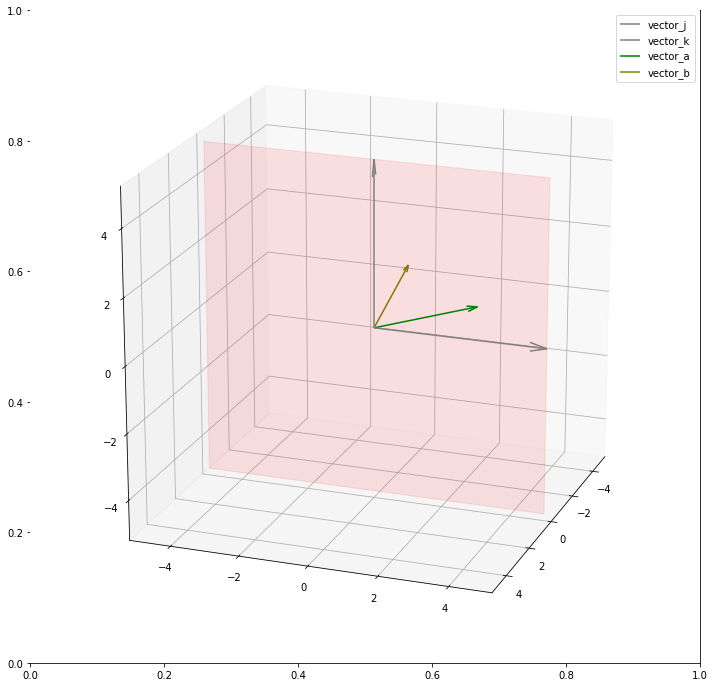

v_a_b.T rref:
⎛⎡0  1  0⎤        ⎞
⎜⎢       ⎥, (1, 2)⎟
⎝⎣0  0  1⎦        ⎠


In [8]:
from matplotlib.patches import PathPatch,Rectangle
import mpl_toolkits.mplot3d.art3d as art3d

fig, ax=plt.subplots(figsize=(12,12))
ax=fig.add_subplot( projection='3d')
p=Rectangle((-5, -5), 10,10,color='red', alpha=0.1)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x",)

C=CoordSys3D('C')
vector_0=Vector.zero
vector_1=5*C.j
vector_plot_3d(ax,C,vector_0,vector_1,color='gray',label='vector_j',arrow_length_ratio=0.1)
vector_2=5*C.k
vector_plot_3d(ax,C,vector_0,vector_2,color='gray',label='vector_k',arrow_length_ratio=0.1)

vector_a=0*C.i+3*C.j+1*C.k
vector_b=0*C.i+1*C.j+2*C.k
vector_plot_3d(ax,C,vector_0,vector_a,color='green',label='vector_a',arrow_length_ratio=0.1)
vector_plot_3d(ax,C,vector_0,vector_b,color='olive',label='vector_b',arrow_length_ratio=0.1)

ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(-5,5)

ax.legend()
ax.view_init(20,20) #可以旋转图形的角度，方便观察
plt.show()

v_a_b=vector_a.to_matrix(C).col_insert(-1,vector_b.to_matrix(C))
print("v_a_b.T rref:")
pprint(v_a_b.T.rref())

### 2.2.1.3  线性映射

#### 1）定义，线性映射的矩阵计算方法，像

假设$\begin{bmatrix}  x_{1i} \\x_{2i}\\ \vdots \\x_{ni} \end{bmatrix} $和$\begin{bmatrix}  x_{1j} \\x_{2j}\\ \vdots \\x_{nj} \end{bmatrix} $为$\\R^{n} $的任意元素，$f$为从$\\R^{n} $到$\\R^{m} $的映射。当映射$f$满足以下两个条件时，则称映射$f$是从$\\R^{n} $到$\\R^{m} $线性映射。1. $f \Bigg\{  \begin{bmatrix}x_{1i}  \\x_{2i}\\ \vdots \\x_{ni} \end{bmatrix}  \Bigg\}+f \Bigg\{  \begin{bmatrix}x_{1j}  \\x_{2j}\\ \vdots \\x_{nj} \end{bmatrix}  \Bigg\}$与$f \Bigg\{  \begin{bmatrix}x_{1i} +x_{1j} \\x_{2i}+x_{2j}\\ \vdots \\x_{ni}+x_{nj} \end{bmatrix}  \Bigg\} $相等；2. $cf \Bigg\{  \begin{bmatrix}x_{1i}  \\x_{2i}\\ \vdots \\x_{ni} \end{bmatrix}  \Bigg\} $与$f \Bigg\{ c \begin{bmatrix}x_{1i}  \\x_{2i}\\ \vdots \\x_{ni} \end{bmatrix}  \Bigg\} $相等。从$\\R^{n} $到$\\R^{m} $线性映射，可以被称为线性变换或一次变换。为了方便理解线性变换，可以将映射$f$理解为一个函数（变换矩阵），输入一个向量，经过$f$作用后，而后输出一个向量的过程，即向量发生了运动。就是，当$\begin{bmatrix}  x_{1} \\x_{2}\\ \vdots \\x_{n} \end{bmatrix} $ （输入）通过$m \times n$矩阵$\begin{bmatrix} a_{11}  & a_{12}& \ldots & a_{1n}  \\ a_{21}  & a_{22}& \ldots & a_{2n} \\ 
 \vdots & \vdots & \ddots & \vdots \\  a_{m1}  & a_{m2}& \ldots & a_{mn} \end{bmatrix} $对应的从$\\R^{n} $到$\\R^{m} $的线性映射，形成的像是$\begin{bmatrix}  y_{1} \\y_{2}\\ \vdots \\y_{n} \end{bmatrix} $（输出），其矩阵计算公式表示为：$f\Bigg\{\begin{bmatrix}  x_{1} \\x_{2}\\ \vdots \\x_{n} \end{bmatrix}\Bigg\}=\begin{bmatrix} a_{11}  & a_{12}& \ldots & a_{1n}  \\ a_{21}  & a_{22}& \ldots & a_{2n} \\ 
 \vdots & \vdots & \ddots & \vdots \\  a_{m1}  & a_{m2}& \ldots & a_{mn} \end{bmatrix} \begin{bmatrix}  x_{1} \\x_{2}\\ \vdots \\x_{n} \end{bmatrix}=\begin{bmatrix} a_{11}  & a_{12}& \ldots & a_{1n}  \\ a_{21}  & a_{22}& \ldots & a_{2n} \\ 
 \vdots & \vdots & \ddots & \vdots \\  a_{m1}  & a_{m2}& \ldots & a_{mn} \end{bmatrix} \Bigg\{   x_{1}   \begin{bmatrix}1 \\0\\ \vdots \\0 \end{bmatrix}  +x_{2}   \begin{bmatrix}0 \\1\\ \vdots \\0 \end{bmatrix} + \ldots +x_{n}   \begin{bmatrix}0 \\0\\ \vdots \\1 \end{bmatrix} \Bigg\}$。对像而言，即假设$x_{i} $是集合$X$的元素，把通过映射$f$与$x_{i} $对应的集合$Y$的元素叫做$x_{i} $通过映射$f$形成的像。
 
定义三维的C向量空间，单位向量为$\vec{i},\vec{j},\vec{k}$，定义v_1向量的系数为a1,a2,a3=-1,2,0，其中0可以省略，即为v_1=a1*i+a2*j=-1*i+2*j向量。给定新的向量集合v_2，v_3，通过计算简化的行阶梯形矩阵，判断为向量无关，因此将该数据集作为基，可以建立新的向量空间，并由v_2，v_3的基构建变换矩阵，v_1的系数矩阵乘以变换矩阵计算得新向量空间下的v_1在相对于C（原）向量空间下的向量v_1_N。

v_2,v_3简化的行阶梯形矩阵:
__________________________________________________
⎛⎡1  0  0⎤        ⎞
⎜⎢       ⎥, (0, 1)⎟
⎝⎣0  1  0⎦        ⎠


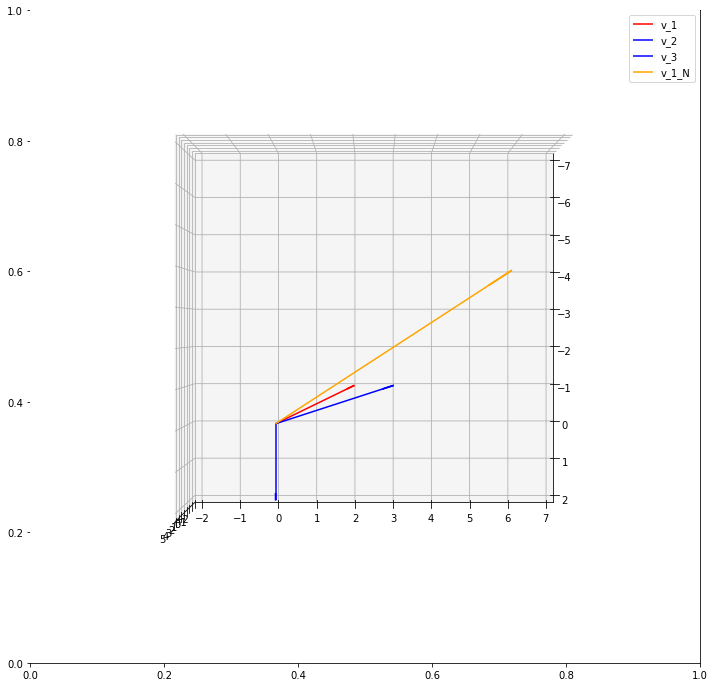

In [9]:
fig, ax=plt.subplots(figsize=(12,12))
ax=fig.add_subplot( projection='3d')

a1,a2=sympy.symbols(["a1","a2",])
a1=-1
a2=2

C=CoordSys3D('C')
i, j, k = C.base_vectors()
v_0=Vector.zero
v_1=a1*i+a2*j
vector_plot_3d(ax,C,v_0,v_1,color='red',label='v_1',arrow_length_ratio=0.1)

v_2=-1*i+3*j
vector_plot_3d(ax,C,v_0,v_2,color='blue',label='v_2',arrow_length_ratio=0.1)
v_3=2*i+0*j
vector_plot_3d(ax,C,v_0,v_3,color='blue',label='v_3',arrow_length_ratio=0.1)

def vector2matrix_rref(v_list,C):
    '''
    function - 将向量集合转换为向量矩阵，并计算简化的行阶梯形矩阵
    
    Paras:
        v_list - 向量列表
        C - sympy定义的坐标系统

        return:
        v_matrix.T - 转换后的向量矩阵,即线性变换矩阵
    '''
    v_matrix=v_list[0].to_matrix(C)
    for v in v_list[1:]:
        v_temp=v.to_matrix(C)
        v_matrix=v_matrix.col_insert(-1,v_temp)
        
    print("_"*50)
    pprint(v_matrix.T.rref())
    return v_matrix.T
print("v_2,v_3简化的行阶梯形矩阵:")
v_2_3=vector2matrix_rref([v_2,v_3],C)  #通过rref()返回简化的行阶梯形矩阵，判断向量集合v_2,v_3为向量无关。返回线性变换矩阵

#由向量无关的向量集合v_2,v_3生成新的向量空间，相对于原向量空间下i,j,k单位向量，i,j,k新的位置
v_1_N_matrix=Matrix([a1,a2]).T*v_2_3 #根据变换矩阵，计算系数同为a1,a2向量的位置
from sympy.vector import matrix_to_vector
v_1_N=matrix_to_vector(v_1_N_matrix,C) #向量转矩阵
vector_plot_3d(ax,C,v_0,v_1_N,color='orange',label='v_1_N',arrow_length_ratio=0.1) #绘制新位置向量

ax.set_xlim3d(-7,2)
ax.set_ylim3d(-2,7)
ax.set_zlim3d(-2,5)

ax.legend()
ax.view_init(90,0) #可以旋转图形的角度，方便观察
plt.show()

#### 2）特殊的线性映射（线性变换）

线性映射的矩阵计算方法就是将待变换的对象（向量集合），通过乘以变换矩阵，就可获得同一向量空间下新的对象。使用sympy比较方便数据量比较小的矩阵运算，方便观察矩阵形式。但是如果数据量大，则使用numpy库所提供的矩阵计算方法。在下述案例中，从[semantic3d](http://semantic3d.net/)下载城市点云数据'bildstein_station1'，并对其进行了降采样，以加快计算速度。对于点云数据的处理可参考点云部分。

点云数据读取后，包括的信息有点坐标和点颜色。点坐标可以理解为在单位向量为$\vec{i},\vec{j},\vec{k}$的$C$向量空间下的向量，如果提供相应的变换矩阵，就可以对原点云数据加以空间上的变换，例如移动、旋转、缩放、透视、镜像、切变等。缩放对应的矩阵为：$ \begin{bmatrix}scale & 0&0 \\0 &scale&0\\0&0&scale \end{bmatrix} $；延z轴（$\vec{k}$）旋转对应的矩阵为：$ \begin{bmatrix} cos( \theta ) & -sin( \theta )&0 \\sin( \theta ) &cos( \theta )&0\\0&0&1\end{bmatrix} $；给定点S(x,y,z)的透视为：$ \frac{1}{- s_{z} }  \begin{bmatrix}  s_{z} & 0& s_{x}&0 \\0 &-s_{z} & s_{y} &0\\ 0&0&1&0 
 \\0&0&1&-s_{z} \end{bmatrix} $，透视变换中使用了齐次坐标（homogeneous coordinates）。

In [12]:
import open3d as o3d
import numpy as np
import pandas as pd
import matplotlib

cloud_pts_fp="./data/bildstein_station1.txt"
cloud_pts=pd.read_csv(cloud_pts_fp)
#cloud_pts['hex']=cloud_pts.apply(lambda row:'%02x%02x%02x' % (int(row.r/255),int(row.g/255),int(row.b/255)),axis=1)
print("data reading completed")
cloud_pts['hex']=cloud_pts.apply(lambda row:matplotlib.colors.to_hex([row.r/255,row.g/255,row.b/255]),axis=1) #将色彩rgb格式转换为hex格式，用于matplotlib图形打印

data reading completed


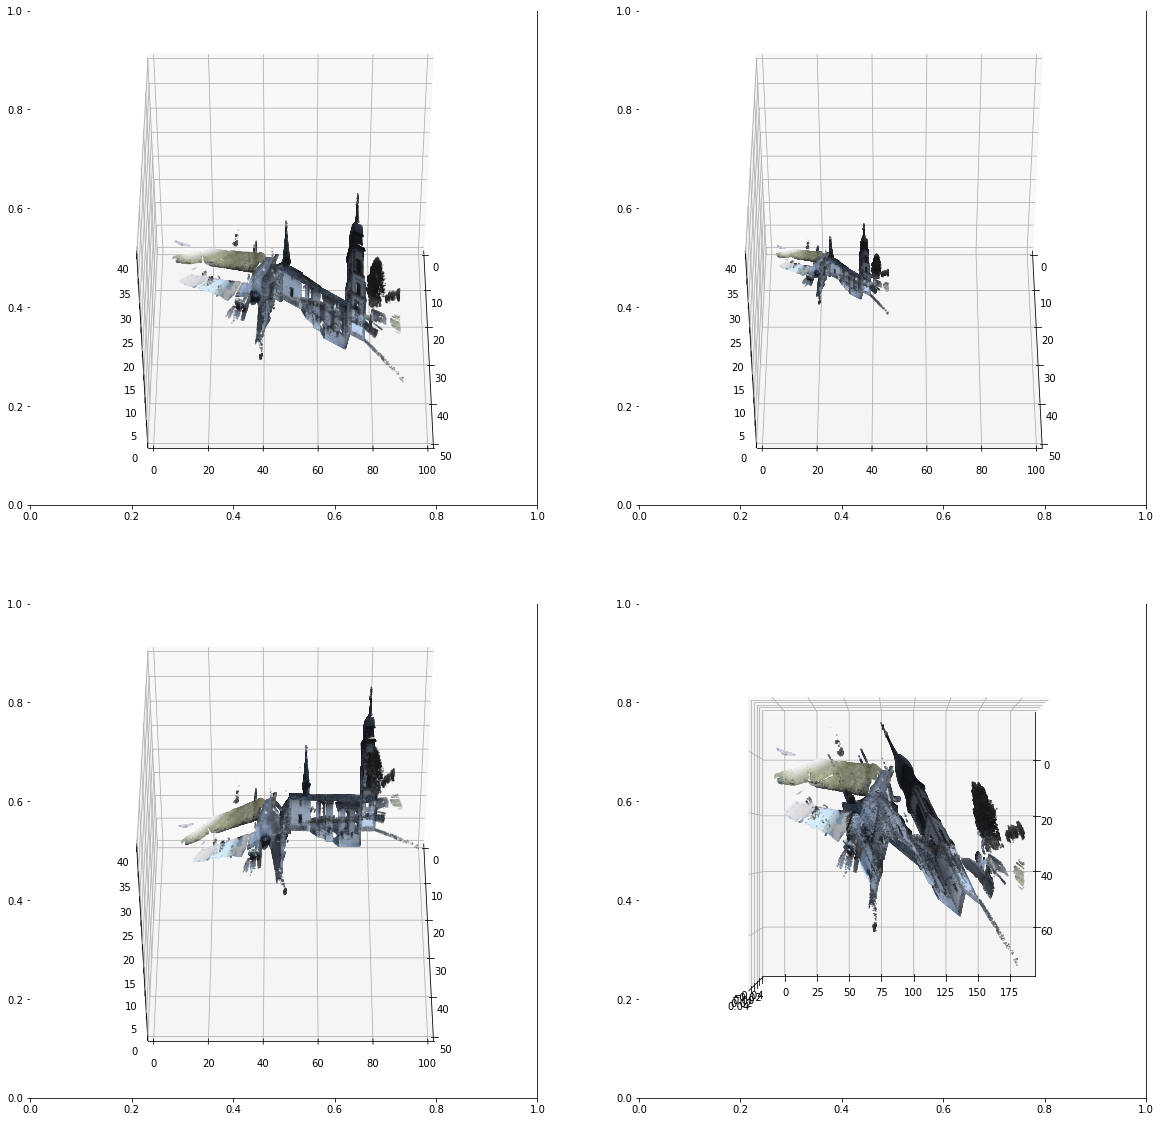

In [19]:
import matplotlib.pyplot as plt
import matplotlib
import sympy,math
from sympy import Matrix,pprint
import numpy as np

pts=cloud_pts[["x","y","z"]].to_numpy()

fig, axs=plt.subplots(ncols=2, nrows=2,figsize=(20,20))
axs[0,0]=fig.add_subplot(2,2,1, projection='3d')
axs[0,1]=fig.add_subplot(2,2,2, projection='3d')
axs[1,0]=fig.add_subplot(2,2,3, projection='3d')
axs[1,1]=fig.add_subplot(2,2,4, projection='3d')

axs[0,0].scatter(cloud_pts.x,cloud_pts.y,cloud_pts.z,c=cloud_pts.hex,s=0.1)
#A - 缩放
scale=0.5
f_scale=np.array([[scale,0,0],[0,scale,0],[0,0,scale]])
pts_scale=np.matmul(pts,f_scale)
axs[0,1].scatter(pts_scale[:,0],pts_scale[:,1],pts_scale[:,2],c=cloud_pts.hex,s=0.1)

#B - 旋转
angle=math.radians(-20) #度转换为弧度
f_rotate=np.array([[math.cos(angle),-math.sin(angle),0],[math.sin(angle),math.cos(angle),0],[0,0,1]])
pts_rotate=np.matmul(pts,f_rotate)
axs[1,0].scatter(pts_rotate[:,0],pts_rotate[:,1],pts_rotate[:,2],c=cloud_pts.hex,s=0.1)

#C - 透视
s1,s2,s3=2,2,2
f_persp=np.array([[-s3,0,0,0],[0,-s3,0,0],[s1,s2,0,1],[0,0,0,-s3]])*1/(1-s3)
pts_homogeneousCoordinates=np.hstack((pts,np.ones(pts.shape[0]).reshape(-1,1)))
pts_persp=np.matmul(pts_homogeneousCoordinates,f_persp)
axs[1,1].scatter(pts_persp[:,0],pts_persp[:,1],pts_persp[:,2],c=cloud_pts.hex,s=0.1)

axs[0,0].set_xlim3d(0,50)
axs[0,0].set_ylim3d(0,100)
axs[0,0].set_zlim3d(0,40)

axs[0,1].set_xlim3d(0,50)
axs[0,1].set_ylim3d(0,100)
axs[0,1].set_zlim3d(0,40)

axs[1,0].set_xlim3d(0,50)
axs[1,0].set_ylim3d(0,100)
axs[1,0].set_zlim3d(0,40)

axs[0,0].view_init(45,0) #可以旋转图形的角度，方便观察
axs[0,1].view_init(45,0)
axs[1,0].view_init(45,0)
axs[1,1].view_init(90,0)
plt.show()

#### 3）秩

$f$为从$\\R^{n} $到$\\R^{m} $的映射，被映射到零元素（$\vec 0$）的全体元素的集合，即集合$\Bigg\{\begin{bmatrix}  x_{1} \\x_{2}\\ \vdots \\x_{n} \end{bmatrix} \bigg\rvert_{} \begin{bmatrix}0 \\0\\ \vdots \\0\end{bmatrix} =\begin{bmatrix} a_{11}  & a_{12}& \ldots & a_{1n}  \\ a_{21}  & a_{22}& \ldots & a_{2n} \\ 
 \vdots & \vdots & \ddots & \vdots \\  a_{m1}  & a_{m2}& \ldots & a_{mn} \end{bmatrix} \begin{bmatrix}  x_{1} \\x_{2}\\ \vdots \\x_{n} \end{bmatrix}\Bigg\}$称为映射$f$的核，一般表示为$K_{er} f$。为了与’映射$f$的核‘相呼应，则把’映射$f$的值域‘，即集合$f\Bigg\{\begin{bmatrix} y_{1}  \\y_{2} \\ \vdots \\y_{m} \end{bmatrix}   \bigg\rvert_{}   \begin{bmatrix}  y_{1}  \\y_{2} \\ \vdots \\y_{m} \end{bmatrix} =\begin{bmatrix} a_{11}  & a_{12}& \ldots & a_{1n}  \\ a_{21}  & a_{22}& \ldots & a_{2n} \\ 
 \vdots & \vdots & \ddots & \vdots \\  a_{m1}  & a_{m2}& \ldots & a_{mn} \end{bmatrix} \begin{bmatrix}  x_{1} \\x_{2}\\ \vdots \\x_{n} \end{bmatrix}\Bigg\}$称为’映射$f$的像空间‘，一般表示为为$I_{m} f$。
 
 $K_{er} f$是$\\R^{n} $的子空间，$I_{m} f$是$\\R^{m} $的子空间。在$K_{er} f$与$I_{m} f$之间，有’维数公式‘：$n- dimK_{er} f=dim I_{m}f $。
 
 把向量$ \begin{bmatrix} a_{11} \\ a_{21}\\ \vdots \\ a_{m1}   \end{bmatrix},\begin{bmatrix} a_{12} \\ a_{22}\\ \vdots \\ a_{m2}   \end{bmatrix} , \ldots , \begin{bmatrix} a_{1n} \\ a_{2n}\\ \vdots \\ a_{mn}   \end{bmatrix} $中线性无关的向量的个数，即$\\R^{m} $子空间$I_{m} f$的维数称为$m \times n$矩阵$\begin{bmatrix} a_{11}  & a_{12}& \ldots & a_{1n}  \\ a_{21}  & a_{22}& \ldots & a_{2n} \\ 
 \vdots & \vdots & \ddots & \vdots \\  a_{m1}  & a_{m2}& \ldots & a_{mn} \end{bmatrix} $的秩，一般表示为$rank\begin{bmatrix} a_{11}  & a_{12}& \ldots & a_{1n}  \\ a_{21}  & a_{22}& \ldots & a_{2n} \\ 
 \vdots & \vdots & \ddots & \vdots \\  a_{m1}  & a_{m2}& \ldots & a_{mn} \end{bmatrix} $，或$r(A),rank(A),rk(A)$。
 
 用sympy计算秩（rank）方法为matrix.rank()。

### 2.2.1.4  特征值和特征向量

在特殊的线性映射部分，假设给定单位向量为$\vec{i},\vec{j},\vec{k}$，即$\begin{bmatrix}1& 0&0 \\0 & 1&0 \\0&0&1\end{bmatrix} $的$C$向量空间，通过变换矩阵$ \begin{bmatrix}scale1 & 0&0 \\0 &scale2&0\\0&0&scale3 \end{bmatrix} $实现了对原向量集（点云数据）的缩放。为方便解释，如果仅考虑点云数据中的一个点，$c_{1}, c_{2},c_{3}=x,y,z=39,73,22$，，则该点在$C$向量空间的向量为$C_{1}i+C_{2}j+C_{3}k=C_{1} \begin{bmatrix}1\\0\\0 \end{bmatrix}+ C_{2} \begin{bmatrix}0\\1\\0 \end{bmatrix}+ C_{3} \begin{bmatrix}0\\0\\1 \end{bmatrix}$。进行线性映射和公式变换，$ \begin{bmatrix}scale1 & 0&0 \\0 &scale2&0\\0&0&scale3 \end{bmatrix}\Bigg\{C_{1} \begin{bmatrix}1\\0\\0 \end{bmatrix}+ C_{2} \begin{bmatrix}0\\1\\0 \end{bmatrix}+ C_{3} \begin{bmatrix}0\\0\\1 \end{bmatrix}\Bigg\}= C_{1} \begin{bmatrix}scale1 & 0&0 \\0 &scale2&0\\0&0&scale3 \end{bmatrix}\begin{bmatrix}1\\0\\0 \end{bmatrix}+C_{2} \begin{bmatrix}scale1 & 0&0 \\0 &scale2&0\\0&0&scale3 \end{bmatrix}\begin{bmatrix}0\\1\\0 \end{bmatrix}+C_{3} \begin{bmatrix}scale1 & 0&0 \\0 &scale2&0\\0&0&scale3 \end{bmatrix}\begin{bmatrix}0\\0\\1 \end{bmatrix}=C_{1}\begin{bmatrix}scale1\\0\\0\end{bmatrix}+C_{1}\begin{bmatrix}0\\scale2\\0\end{bmatrix}+C_{1}\begin{bmatrix}0\\0\\scale3 \end{bmatrix}=C_{1}\Bigg\{scale1 \begin{bmatrix}1\\0\\0 \end{bmatrix}  \Bigg\}+C_{2}\Bigg\{scale2 \begin{bmatrix}0\\1\\0 \end{bmatrix}  \Bigg\}+C_{3}\Bigg\{scale3 \begin{bmatrix}0\\0\\1\end{bmatrix}  \Bigg\}$，变换后的公式保持了$C$向量空间下的单位向量$\vec{i},\vec{j},\vec{k}$不变，则$scale1,scale2,scale3$为变换矩阵的特征值，而$scale1$对应的$\begin{bmatrix}1\\0\\0\end{bmatrix} $，$scale2$对应的$\begin{bmatrix}0\\1\\0\end{bmatrix} $，$scale3$对应的$\begin{bmatrix}0\\0\\1\end{bmatrix} $，为其特征向量。

当$\begin{bmatrix}  x_{1} \\x_{2}\\ \vdots \\x_{n} \end{bmatrix} $ （输入）通过$m \times n$矩阵$\begin{bmatrix} a_{11}  & a_{12}& \ldots & a_{1n}  \\ a_{21}  & a_{22}& \ldots & a_{2n} \\ 
 \vdots & \vdots & \ddots & \vdots \\  a_{m1}  & a_{m2}& \ldots & a_{mn} \end{bmatrix} $对应的从$\\R^{n} $到$\\R^{m} $的线性映射$f$，形成的像是$\begin{bmatrix}  y_{1} \\y_{2}\\ \vdots \\y_{n} \end{bmatrix} = \lambda \begin{bmatrix}  x_{1} \\x_{2}\\ \vdots \\x_{n} \end{bmatrix} $（输出），则把$、lambda $叫做方阵$\begin{bmatrix} a_{11}  & a_{12}& \ldots & a_{1n}  \\ a_{21}  & a_{22}& \ldots & a_{2n} \\ 
 \vdots & \vdots & \ddots & \vdots \\  a_{m1}  & a_{m2}& \ldots & a_{mn} \end{bmatrix} $的特征值（eigenvalue），把$\begin{bmatrix}  x_{1} \\x_{2}\\ \vdots \\x_{n} \end{bmatrix} $ 叫做与特征值$\lambda$对应的特征向量(eigenvector)。此外，零向量不能解释为特征向量。
 
sympy库提供了matrix.eigenvals()，matrix.eigenvects()方法直接计算特征值和特征向量。

In [20]:
scale1,scale2,scale3=sympy.symbols(['scale1','scale2','scale3'])
M=Matrix(3, 3, [scale1*1, 0, 0, 0, scale2*1, 0, 0, 0, scale3*1])
pprint(M)
print("eigenvals:")
pprint(M.eigenvals())
print("eigenvects:")
pprint(M.eigenvects())

⎡scale₁    0       0   ⎤
⎢                      ⎥
⎢  0     scale₂    0   ⎥
⎢                      ⎥
⎣  0       0     scale₃⎦
eigenvals:
{scale₁: 1, scale₂: 1, scale₃: 1}
eigenvects:
⎡⎛           ⎡⎡1⎤⎤⎞  ⎛           ⎡⎡0⎤⎤⎞  ⎛           ⎡⎡0⎤⎤⎞⎤
⎢⎜           ⎢⎢ ⎥⎥⎟  ⎜           ⎢⎢ ⎥⎥⎟  ⎜           ⎢⎢ ⎥⎥⎟⎥
⎢⎜scale₁, 1, ⎢⎢0⎥⎥⎟, ⎜scale₂, 1, ⎢⎢1⎥⎥⎟, ⎜scale₃, 1, ⎢⎢0⎥⎥⎟⎥
⎢⎜           ⎢⎢ ⎥⎥⎟  ⎜           ⎢⎢ ⎥⎥⎟  ⎜           ⎢⎢ ⎥⎥⎟⎥
⎣⎝           ⎣⎣0⎦⎦⎠  ⎝           ⎣⎣0⎦⎦⎠  ⎝           ⎣⎣1⎦⎦⎠⎦
